## SQLite簡介

SQLite，是一款輕型的資料庫，是遵守ACID的關係型資料庫管理系統，它包含在一個相對小的C庫中。它是D.RichardHipp建立的公有領域專案。

它的設計目標是嵌入式的，而且目前已經在很多嵌入式產品中使用了它，它佔用資源非常的低，在嵌入式裝置中，可能只需要幾百K的記憶體就夠了。

它能夠支援Windows/Linux/Unix等等主流的作業系統，同時能夠跟很多程式語言相結合，比如 Tcl、C#、PHP、Java等，還有ODBC介面，同樣

比起MySQL、PostgreSQL這兩款開源的世界著名資料庫管理系統來講，它的處理速度比他們都快。SQLite第一個Alpha版本誕生於2000年5月。 

至2015年已經有15個年頭，SQLite也迎來了一個版本 SQLite 3已經發布。

SQLite資料庫的使用

1.匯入Python SQLite資料庫模組

python2.5版本以後內建SQLite資料庫

In [8]:
import sqlite3

In [9]:
# 2. 建立/開啟資料庫

# 呼叫connect函式的時候，指定庫名稱，如果指定的資料庫存在就直接開啟這個資料庫，如果不存在就新建立一個再開啟


conn = sqlite3.connect("test.db")

In [10]:
# 或者也可以在記憶體中建立

# conn = sqlite3.connect(":memory:")

In [11]:
# 3.資料庫連線物件

# 開啟資料庫時返回的物件conn就是一個資料庫連線物件，它可以有以下操作：

# commit()–事務提交
# rollback()–事務回滾
# close()–關閉一個資料庫連線
# cursor()–建立一個遊標

# 關於commit()，如果isolation_level隔離級別預設，那麼每次對資料庫的操作，都需要使用該命令，你也可以設定isolation_level=None，

# 這樣就變為自動提交模式。

# 4.使用遊標查詢資料庫

# 我們需要使用遊標物件SQL語句查詢資料庫，獲得查詢物件。 通過以下方法來定義一個遊標。

cu=conn.cursor()

In [12]:
# 遊標物件有以下的操作：

# execute()–執行sql語句
# executemany–執行多條sql語句
# close()–關閉遊標
# fetchone()–從結果中取一條記錄，並將遊標指向下一條記錄
# fetchmany()–從結果中取多條記錄
# fetchall()–從結果中取出所有記錄
# scroll()–遊標滾動

In [ ]:
# SQLite資料庫操作

# 1. 建立資料庫表


cu.execute("create table user (id integer primary key,name varchar(20) UNIQUE,age integer,comment text NULL)")
# 建立一張user表，表中有id(主鍵),名字(唯一),年齡,備註(預設為空)

In [15]:
# 2. 插入資料

# 請注意避免以下寫法：


# 這樣寫會導致注入攻擊
# pid=200
# c.execute("... where id= '%s'" % id)

# 正確的做法如下，如果t只是單個數值，也要採用t=(n,)的形式，因為元組是不可變的。


for user in[(0,'aaa',111,'aaaa'),(1,'bbb',222,'bbbb')]:
    conn.execute("insert into user values (?,?,?,?)", user) # 注意user是元組，不可變
    conn.commit() # 注意插入操作之後要進行提交

In [16]:
#3. 查詢資料
cu.execute("select * from user")
cu.fetchone() # 得到遊標的第一個值
cu.execute("select * from user")
cu.fetchall() # 使用遊標的fetch函式,fetchall得到所有的查詢記錄

[(0, 'aaa', 111, 'aaaa'), (1, 'bbb', 222, 'bbbb')]

In [17]:
#4. 修改資料


cu.execute("update user set name='ccc' where id = 0")
conn.commit()

In [18]:
#5. 刪除資料


cu.execute("delete from user where id = 1")
conn.commit()

In [20]:
#初始化
import pandas as pd #引入Pandas模組 as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
# 指定默認字形：解決plot不能顯示中文問題
mpl.rcParams['axes.unicode_minus'] = False

In [21]:
# 讀取檔案

df=pd.read_csv(r'AQI.csv')

In [22]:
#樞紐關係表
df.pivot_table

<bound method DataFrame.pivot_table of    SiteName County  AQI Pollutant Status  SO2     CO  CO_8hr   O3  O3_8hr  \
0    臺南(北門)    臺南市   20       NaN     良好  0.0   0.18     0.2   16    22.0   
1    屏東(琉球)    屏東縣   24       NaN     良好  1.8   0.11     0.2   22    26.0   
2    新北(樹林)    新北市   41       NaN     良好  1.4   0.19     0.3   27    37.0   
3    彰化(大城)    彰化縣   16       NaN     良好  1.4   0.24     0.3  3.3    17.0   
4    臺南(麻豆)    臺南市   23       NaN     良好  3.5    0.5     0.6   20    25.0   
5       富貴角    新北市   39       NaN     良好  0.4   0.14     0.2   41    42.0   
6        麥寮    雲林縣   22       NaN     良好  0.8   0.11     0.2   18    24.0   
7        關山    臺東縣   24       NaN     良好  0.8      -     NaN   24    26.0   
8        馬公    澎湖縣   24       NaN     良好  1.9    NaN     NaN   18    26.0   
9        金門    金門縣   34       NaN     良好  2.3   0.12     0.1   37    35.0   
10       馬祖    連江縣   57     細懸浮微粒     普通  2.1   0.16     0.2   45    41.0   
11       埔里    南投縣   36       NaN    

/Users/shuhui/anaconda3/envs/Python3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33274 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shuhui/anaconda3/envs/Python3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shuhui/anaconda3/envs/Python3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shuhui/anaconda3/envs/Python3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shuhui/anaconda3/envs/Python3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shuhui/a

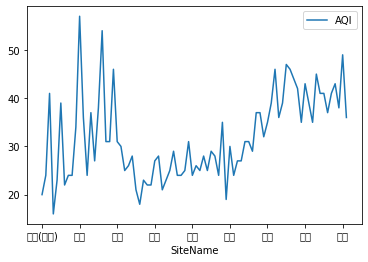

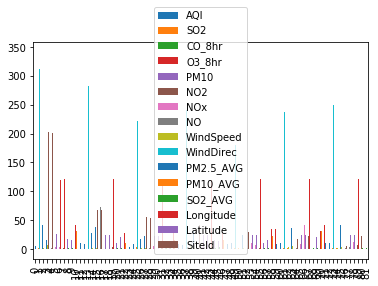

In [29]:
#資料視覺化
#進行繪圖(X軸為地點,Y軸為AQI數值)
df.plot(x='SiteName', y=['AQI'])


#繪製長條圖
df.plot(kind='bar')   #垂直

#存檔
df.to_csv('New_Data.csv',encoding='utf8')  #存檔至New_Data.csv中

df.to_excel('New_Data.xlsx', encoding='utf8')#存檔至New_Data.xlsx
df.to_html('New_Data.html', encoding='utf8') #存檔至New_Data.html

con = sqlite3.connect('mydatabase.db')    #存檔至mydatabase.db
df.to_sql('users', con)

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


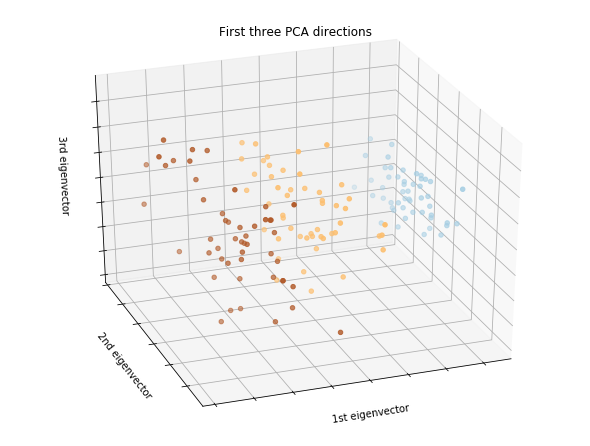

In [42]:
iris = datasets.load_iris()
# import some data to play with

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
X_reduced = PCA(n_components=3).fit_transform(iris.data)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [46]:
import sqlite3

#連結資料庫檔案
con = sqlite3.connect('myDB.db')

#建立cursor物件
c = con.cursor()

#建立資料表的查詢指令
createStr = 'CREATE TABLE Employee\
       (ID INT PRIMARY KEY     NOT NULL,\
       NAME           TEXT    NOT NULL,\
       BIRTHYEAR      INT     NOT NULL,\
       ADDRESS        CHAR(50),\
       SALARY         INT);'
#執行建立資料表的指令
c.execute(createStr)

#新增資料至資料表
c.execute("INSERT INTO Employee (ID, NAME, BIRTHYEAR, ADDRESS, SALARY) \
      VALUES (1, '小陳', 1997, '新北市', 58000 )")
c.execute("INSERT INTO Employee (ID, NAME, BIRTHYEAR, ADDRESS, SALARY) \
      VALUES (2, '小范', 2000, '臺北市', 50000 )")
c.execute("INSERT INTO Employee (ID, NAME, BIRTHYEAR, ADDRESS, SALARY) \
      VALUES (3, '小施', 1999, '高雄市', 47000 )")
c.execute("INSERT INTO Employee (ID, NAME, BIRTHYEAR, ADDRESS, SALARY) \
      VALUES (4, '小吳', 1998, '台中市', 52000 )")

#確認新增
con.commit()

#執行查詢Employee資料表的所有內容
cursor = c.execute("SELECT * from Employee")

#檢視查詢結果
for record in cursor:
    print(record)

#關閉與資料庫的連結
con.close()

(1, '小陳', 1997, '新北市', 58000)
(2, '小范', 2000, '臺北市', 50000)
(3, '小施', 1999, '高雄市', 47000)
(4, '小吳', 1998, '台中市', 52000)


In [47]:
import sqlite3
import csv

#連結資料庫檔案
con = sqlite3.connect('myDB2.db')

#建立cursor物件
c = con.cursor()

#建立groups資料表的查詢指令
create_groups = 'CREATE TABLE groups ( \
 group_id int primary key not null, \
 group_name char(50) not null \
);'
c.execute(create_groups)

#建立students資料表的查詢指令
create_students = 'CREATE TABLE students ( \
 student_id int primary key not null, \
 student_name char(50) not null, \
 group_id int not null, \
 FOREIGN KEY (group_id) REFERENCES groups (group_id) \
 ON DELETE NO ACTION ON UPDATE NO ACTION \
);'
c.execute(create_students)

#為groups資料表新增資料
c.execute("INSERT INTO groups (group_id, group_name) VALUES (1, '青色之馬');")
c.execute("INSERT INTO groups (group_id, group_name) VALUES (2, '夢幻之都');")
c.execute("INSERT INTO groups (group_id, group_name) VALUES (3, '新不了城');")

students = []
#讀取students.csv中的資料並將其將入students資料表中
with open('students.csv', encoding='utf8') as file:
    students = list(csv.reader(file, delimiter=','))
    for student in students[1:]:
        c.execute("INSERT INTO students (student_id, student_name, group_id) \
          VALUES (%d, '%s', %d);" % (eval(student[0]), student[1], eval(student[2])))

#確認新增
con.commit()

#執行查詢students資料表中屬於第3組的同學的學號、名字、組號和組名
cursor = c.execute("SELECT S.*, G.group_name \
                   FROM students S, groups G \
                   WHERE S.group_id = G.group_id \
                   AND S.group_id = 3")

#檢視查詢結果
for record in cursor:
    print(record)

#關閉與資料庫的連結
con.close()

(5, '小希', 3, '新不了城')
(9, '小盛', 3, '新不了城')
(10, '小霖', 3, '新不了城')
(11, '小翔', 3, '新不了城')
(14, '小哲', 3, '新不了城')


In [48]:
import matplotlib as mpl
mpl.use('Agg')
# --結束--批改評分使用，請勿變動

# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

# 四個月份
labels = ["Jun","Jul","Aug","Sep"]
sizes = [20, 30, 40, 10]

# 圓餅圖顏色
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

# 長條圖 位置
plt.subplot(1, 2, 1)
xticks = range(0, len(labels) ) # 範例寫法   xticks = range(1, len(labels) + 1 )
# 長條圖以labels為X軸，sizes為Y軸，各長條顏色為藍色（blue）
plt.xticks(xticks, labels)
plt.bar(labels, sizes, color="blue")

# 圓餅圖 位置
plt.subplot(1, 2,2)
# 圓餅圖以labels為圖標，sizes為各項所占百分比
# 圓餅圖colors為各項顏色，突顯「Aug」
# 圓餅圖顯示各項百分比到小數點第1位
explode = (0, 0, 0.1, 0)
plt.pie(sizes , explode= explode , labels = labels ,
        colors= colors , autopct='%1.1f%%')
# 長寬比為1:1
plt.axis('equal')

plt.savefig('chart.png')
plt.close()